In [26]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import jax.numpy as jnp
import jax
from scipy.special import erfcinv

In [27]:
import lib

In [28]:
ns=300
nd=200
rho=1
bias = 2.75 
ndR = 2
kappa = 2.
n_votes = nd
vote_th = bias
la = bias - np.sqrt(2)*erfcinv(2*ndR/nd)
beta = 7.882

# ns=300
# nd=200
# bias = 2.32635
# ndR = 3
# n_votes = nd
# kappa = 3.
# la = 0.445556
# # # beta = 11.5

decay_steps = 30000
n_tested_patterns = 500
initial_steps = 5000

seed = 789456
rng = np.random.default_rng(seed)

neuron = lib.Neuron10_2_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, beta=beta, vote_th=vote_th, seed=rng.integers(100000))
# neuron = lib.Neuron3_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, n_votes=n_votes, vote_th=vote_th, seed=rng.integers(100000))
# neuron = lib.Neuron4_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, la=la, n_votes=n_votes, vote_th=vote_th, seed=rng.integers(100000))

xs_gen = lib.Xs_Generator1(1, ns, normalized_len=np.sqrt(ns), seed=rng.integers(100000))
# xs_gen = lib.Xs_Generator3_2(nd, ns, rho, normalized_len=np.sqrt(ns), seed=rng.integers(100000))

simulation_run = lib.Simulation_Run(neuron, xs_gen, decay_steps=decay_steps, initial_steps=initial_steps, n_tested_patterns=n_tested_patterns, refresh_every=500, seed=rng.integers(100000))

In [29]:
simulation_run.run()

100%|██████████| 30500/30500 [01:02<00:00, 488.32it/s]


In [30]:
upper99_1 = jnp.mean(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), decay_steps-10000:decay_steps])
mean_1_init = jnp.mean(simulation_run.votes_record, axis=0)[0]
print(upper99_1)
print(mean_1_init)

1.4484439
3.9074686


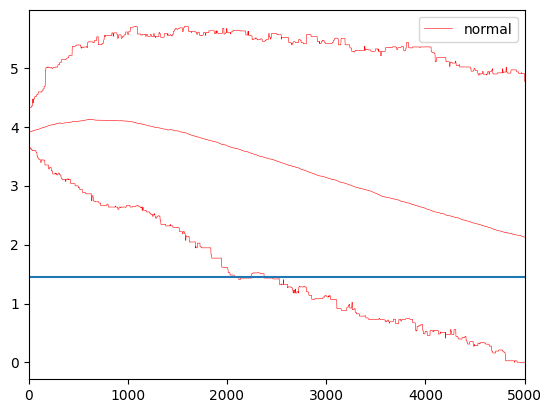

In [32]:
plt.plot(np.mean(simulation_run.votes_record, axis=0)[:decay_steps], c="red", linewidth=0.4, label="normal")
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="red", linewidth=0.4)
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="red", linewidth=0.4)

plt.hlines(upper99_1, 0, decay_steps)
plt.xlim(0, 5000)
plt.legend()

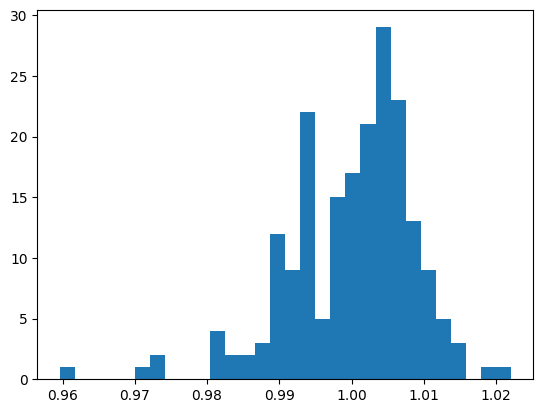

In [11]:
plt.hist(np.linalg.norm(neuron.w, ord=2, axis=-1), bins=30);

In [13]:
ns=300
nd=200
rho = 1
bias = 2.75
ndR = 2
kappa = 2.
n_votes = nd
vote_th = bias
# la = 0.445556
# beta = 11.5

decay_steps = 30000
n_tested_patterns = 500
initial_steps = 5000

seed = 12345
rng = np.random.default_rng(seed)

# neuron2 = lib.Neuron10_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, beta=beta, vote_th=vote_th, seed=rng.integers(100000))
neuron2 = lib.Neuron3_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, ndR=ndR, n_votes=n_votes, vote_th=vote_th, seed=rng.integers(100000))
# neuron = lib.Neuron4_2(n_synapses=ns, n_dendrites=nd, bias=bias, kappa=kappa, la=la, n_votes=n_votes, seed=rng.integers(100000))

# xs_gen = lib.Xs_Generator1(normalized_len=-1, seed=rng.integers(100000))
# xs_gen = lib.Xs_Generator3_1(nd, ns, rho, normalized_len=np.sqrt(ns), seed=rng.integers(100000))
xs_gen = lib.Xs_Generator3_2(nd, ns, rho, normalized_len=np.sqrt(ns), seed=rng.integers(100000))

simulation_run2 = lib.Simulation_Run(neuron2, xs_gen, decay_steps=decay_steps, initial_steps=initial_steps, n_tested_patterns=n_tested_patterns, refresh_every=500, seed=rng.integers(100000))

In [14]:
simulation_run2.run()

  0%|          | 0/30500 [00:00<?, ?it/s]

100%|██████████| 30500/30500 [01:42<00:00, 297.78it/s]


In [15]:
upper99_2 = jnp.mean(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.99), decay_steps-10000:decay_steps])
mean_2_init = jnp.mean(simulation_run2.votes_record, axis=0)[0]
print(upper99_2)
print(mean_2_init)

1.3333833
3.7607183


In [22]:
# mean_time_list0 = np.genfromtxt("tmp_data/meanTimeList0.csv", delimiter=',')
# lower99_time_list0 = np.genfromtxt("tmp_data/lower99TimeList0.csv", delimiter=',')
# upper99_time_list0 = np.genfromtxt("tmp_data/upper99TimeList0.csv", delimiter=',')

# mean_time_list1 = np.genfromtxt("tmp_data/meanTimeList1.csv", delimiter=',')
# lower99_time_list1 = np.genfromtxt("tmp_data/lower99TimeList1.csv", delimiter=',')
# upper99_time_list1 = np.genfromtxt("tmp_data/upper99TimeList1.csv", delimiter=',')

# mean_time_list = np.genfromtxt("tmp_data/meanTimeList.csv", delimiter=',')
# lower99_time_list = np.genfromtxt("tmp_data/lower99TimeList.csv", delimiter=',')
# upper99_time_list = np.genfromtxt("tmp_data/upper99TimeList.csv", delimiter=',')

Text(0, 0.5, 'memory response Y')

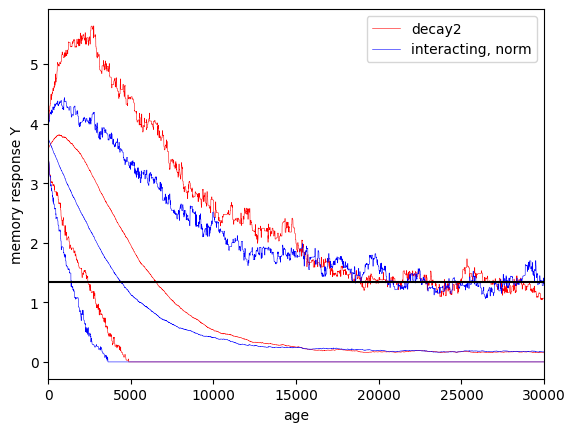

In [25]:
# plt.plot(mean_time_list[:, 0], mean_time_list[:, 1], c="green", linewidth=1.5, label="theory")
# plt.plot(lower99_time_list[:, 0], lower99_time_list[:, 1], c="green", linewidth=1.5)
# plt.plot(upper99_time_list[:, 0], upper99_time_list[:, 1], c="green", linewidth=1.5)

# plt.plot(mean_time_list1[:, 0], mean_time_list1[:, 1], c="orange", linewidth=1.5, label="theory old")
# plt.plot(lower99_time_list1[:, 0], lower99_time_list1[:, 1], c="orange", linewidth=1.5)
# plt.plot(upper99_time_list1[:, 0], upper99_time_list1[:, 1], c="orange", linewidth=1.5)

# plt.plot(mean_time_list0[:, 0], mean_time_list0[:, 1], c="brown", linewidth=1.5, label="theory accurate")
# plt.plot(lower99_time_list0[:, 0], lower99_time_list0[:, 1], c="brown", linewidth=1.5)
# plt.plot(upper99_time_list0[:, 0], upper99_time_list0[:, 1], c="brown", linewidth=1.5)

plt.plot(np.mean(simulation_run.votes_record, axis=0)[:decay_steps]*upper99_2/upper99_1, c="red", linewidth=0.4, label="decay2")
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps]*upper99_2/upper99_1, c="red", linewidth=0.4)
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps]*upper99_2/upper99_1, c="red", linewidth=0.4)

plt.plot(np.mean(simulation_run2.votes_record, axis=0)[:decay_steps], c="blue", linewidth=0.4, label="interacting, norm")
plt.plot(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="blue", linewidth=0.4)
plt.plot(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="blue", linewidth=0.4)

# plt.hlines(upper99_1, 0, decay_steps, colors="red")
plt.hlines(upper99_2, 0, decay_steps, colors="black")
plt.xlim(000, 30000)
plt.legend()
plt.xlabel("age")
plt.ylabel("memory response Y")
# plt.yscale("log")

Text(0, 0.5, 'memory response Y')

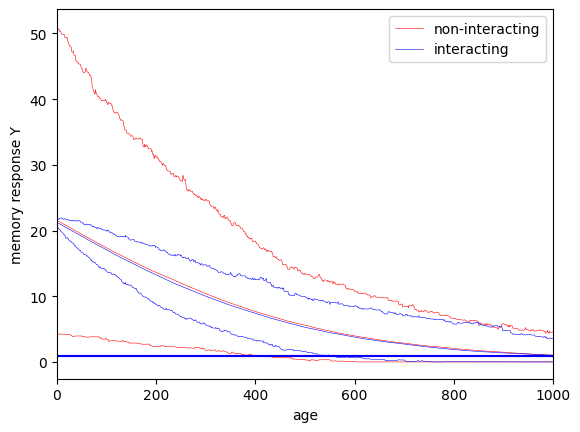

In [19]:
plt.plot(np.mean(simulation_run.votes_record, axis=0)[:decay_steps], c="red", linewidth=0.4, label="non-interacting")
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="red", linewidth=0.4)
plt.plot(np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="red", linewidth=0.4)

plt.plot(np.mean(simulation_run2.votes_record, axis=0)[:decay_steps], c="blue", linewidth=0.4, label="interacting")
plt.plot(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps], c="blue", linewidth=0.4)
plt.plot(np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.99), :decay_steps], c="blue", linewidth=0.4)

plt.hlines(upper99_1, 0, decay_steps, colors="red")
plt.hlines(upper99_2, 0, decay_steps, colors="blue")
plt.xlim(000, 1000)
plt.legend()
plt.xlabel("age")
plt.ylabel("memory response Y")

In [17]:
# tmp = (np.sort(simulation_run.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps] - upper99_1)
# tmp = np.bitwise_and(tmp[:-1]>0, tmp[1:]<0)
# print("single-dendrite: ", np.mean(np.argwhere(tmp)))

tmp = (np.sort(simulation_run2.votes_record, axis=0)[int(n_tested_patterns*0.01), :decay_steps] - upper99_2)
tmp = np.bitwise_and(tmp[:-1]>0, tmp[1:]<0)
print("multi-dendrite: ", np.mean(np.argwhere(tmp)))

multi-dendrite:  1460.5


(array([76., 87., 96., 78., 75., 32., 30., 13.,  5.,  8.]),
 array([0.        , 0.41300783, 0.82601566, 1.23902349, 1.65203133,
        2.06503916, 2.47804699, 2.89105482, 3.30406265, 3.71707048,
        4.13007832]),
 <BarContainer object of 10 artists>)

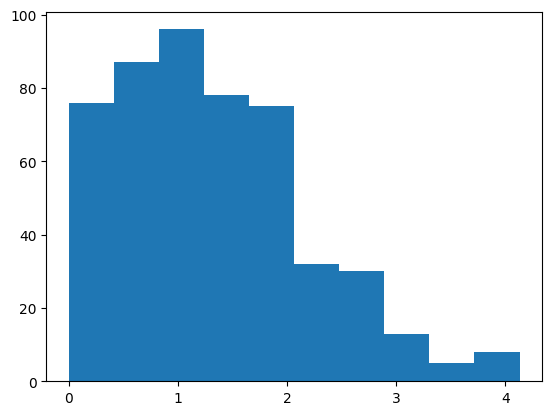

In [30]:
plt.hist(simulation_run2.votes_record[:, 2000])